In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import re
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE 
from tqdm import *

In [ ]:
##### LOAD DATA INSTEAD OF RUNNING THIS #############################################
# Create "body_skill.csv": csv containging unique, non-nan bodies and associated skill

# load pre-selected dataset
df3 = pd.read_csv('../../data/df3.csv')

# get unique problem text
body = df3['body'].unique()
body.shape

# Confirm that, yes, some problems have the same text
dfsub = df3[['problem_id','body']].drop_duplicates(subset='problem_id')
dfbody = dfsub.groupby('body').count()
# dfbody is how many different problem ids each body is associated with

# Begin processing to get skills for each (I know this is inefficeint...)
body_small = body

body_skill = [] # list of all skills, in orders
body_edited = []
for problem in tqdm(body_small):
    if isinstance(problem, str):
        body_edited.append(problem)
        skill = df3[df3['body'] == problem]['skill_name'].iloc[0] # get the first skill associated with the assistment
        body_skill.append(skill)
        
# save above
body_save=pd.DataFrame({'body': body_edited,
  'skill_name': body_skill})
body_save.to_csv('../../data/body_skill_v2.csv',sep='\t',index=False,columns=['body','skill_name'])

In [ ]:
###### LOAD DATA ########
df = pd.read_csv('../../data/body_skill.csv', sep='\t')
body = df['body'].values
skills = df['skill_name'].values
print(body.shape)


In [230]:
body_small = body
print(type(body_small))
body_small.shape

def removeHTML(x):
    # Remove not useful characters and HTML text
    x = re.sub('<.*?>', '', x)
    x = re.sub('\n', ' ', x)
    x = re.sub('&nbsp;', ' ', x)
    x = re.sub('\?', '', x)
    x = re.sub('\\.(\\s)', ' ', x)
    x = re.sub(',', '', x)
    x = re.sub(':', '', x)
    x = re.sub(';', ' ', x)
    x = re.sub('\(', '', x)
    x = re.sub('\)', '', x)
    return x

# Make list of lists of words in each problem
problems = []   # list of lists of words in each problem
wordsAll = []   # list of all words (duplicate words listed more than once)
wordsPerProblem = Counter() # count of how many different problems each word occurred in
for problem in tqdm(body_small):
    if isinstance(problem, str):
        text = removeHTML(problem.lower()) # remove HTML text
        words = text.split() # split into words at white space
        wordsPerProblem += Counter(set(words))
        wordsAll += words
        problems.append(words)
        #print(Counter(set(words)).most_common(), '\n\n')
    
print(len(wordsAll))
print(wordsPerProblem.most_common(20))

  3%|▎         | 546/20123 [00:00<00:03, 5455.79it/s]

<class 'numpy.ndarray'>


100%|██████████| 20123/20123 [00:09<00:00, 2202.51it/s]

691724
[('the', 16830), ('is', 11538), ('of', 11490), ('to', 10620), ('what', 9269), ('a', 7961), ('in', 7811), ('and', 5925), ('for', 4936), ('that', 4604), ('=', 4304), ('below', 4249), ('number', 3934), ('3', 3741), ('2', 3648), ('your', 3640), ('4', 3630), ('answer', 3391), ('this', 3337), ('6', 3264)]


In [231]:
print(body[2200])

<p>What number should be added to the following list to get a&nbsp;range<span style="color: #000000;"> of <span>113</span>?<br id="c7tb1" /></span><br id="c7tb2" /></p>
<div id="c7tb3" style="text-align: left;">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 58,&nbsp;&nbsp;&nbsp; 42,&nbsp;&nbsp;&nbsp; 23,&nbsp;&nbsp;&nbsp; 115,&nbsp;&nbsp;&nbsp; 93<br id="c7tb4" /></div>
<p>&nbsp;</p>


In [232]:
print(skills[2200])

Range


In [233]:
print(removeHTML(body[2200]))

What number should be added to the following list to get a range of 113                                         58    42    23    115    93  


In [264]:
print(np.where(tfidf[2200,:]>0))
print(np.min(tfidf[2200,np.where(tfidf[2200,:]>0)]))
print(np.asarray(wordDict)[np.where(tfidf[2200]>0)])

(array([  1,   2,   3,   5,  13,  25,  42,  47, 113, 165, 247, 269, 321, 493]),)
0.178700431282
['of' 'a' 'to' 'number' 'the' 'what' 'following' 'be' 'get' 'should' '23'
 '42' 'range' 'list']


In [247]:
# Look at the most common words in the dataset
commonWords = list(np.array(Counter(wordsAll).most_common(50))[:,0])
print(commonWords)

['the', 'of', 'to', 'is', 'a', 'in', '=', 'what', 'and', 'number', 'for', '2', '3', 'that', '+', '4', '5', '1', '6', 'we', '-', 'below', 'on', 'answer', 'x', 'this', 'you', 'your', '7', 'now', '8', 'each', 'following', 'find', 'equation', 'value', '10', 'by', 'be', 'from', 'as', 'if', 'use', 'how', 'are', 'problem', '9', 'which', 'fraction', 'shows']


In [248]:
# Create dictionary based on highedt average TFIDF
N = len(problems)
print('Total Number of problems: ',N)

vs = 512 # vocab size
dWordsAll = dict(Counter(wordsAll))
dWordsProb = dict(wordsPerProblem)
dDivide = {k: dWordsAll[k]/N*np.log(N/dWordsProb[k]) for k in dWordsProb.keys() & dWordsAll }
c = Counter(dDivide)
wordDict = list(np.array(c.most_common(vs))[:,0])
print(wordDict)

Total Number of problems:  20123
['=', 'of', 'a', 'to', '2', 'number', 'in', '3', '-', '+', 'for', 'we', 'and', 'the', '1', 'on', 'is', '5', '6', '4', 'x', 'that', 'you', '7', 'answer', 'what', '8', 'this', 'below', 'by', 'your', 'equation', 'each', 'now', 'both', '10', 'value', 'from', 'find', 'do', 'write', 'if', 'following', 'points', 'as', 'students', '*', 'be', 'week', 'are', '9', 'sold', 'use', 'fraction', 'how', 'has', 'will', 'problem', 'day', 'y', 'percent', '12', 'plot', 'which', 'scored', 'at', 'shows', 'graph', 'one', 'first', 'line', 'type', 'numbers', 'nearest', 'original', 'between', 'order', 'solve', 'draw', 'he', 'with', '11', 'round', 'leaf', 'stem', 'expression', 'many', 'c', 'his', 'not', 'example', 'two', 'like', 'know', 'can', 'have', 'solution', 'b', 'an', 'miles', 'favorite', 'there', 'probability', 'show', 'last', '&radic', 'try', 'table', 'or', 'total', 'need', 'operations', '18', 'get', 'players', 'games', '13', 'years', '14', 'was', 'spaces', '16', '15', '&d

  0%|          | 61/20123 [00:00<00:33, 592.89it/s]

Number of problems:  20123.0


100%|██████████| 20123/20123 [00:25<00:00, 795.57it/s]


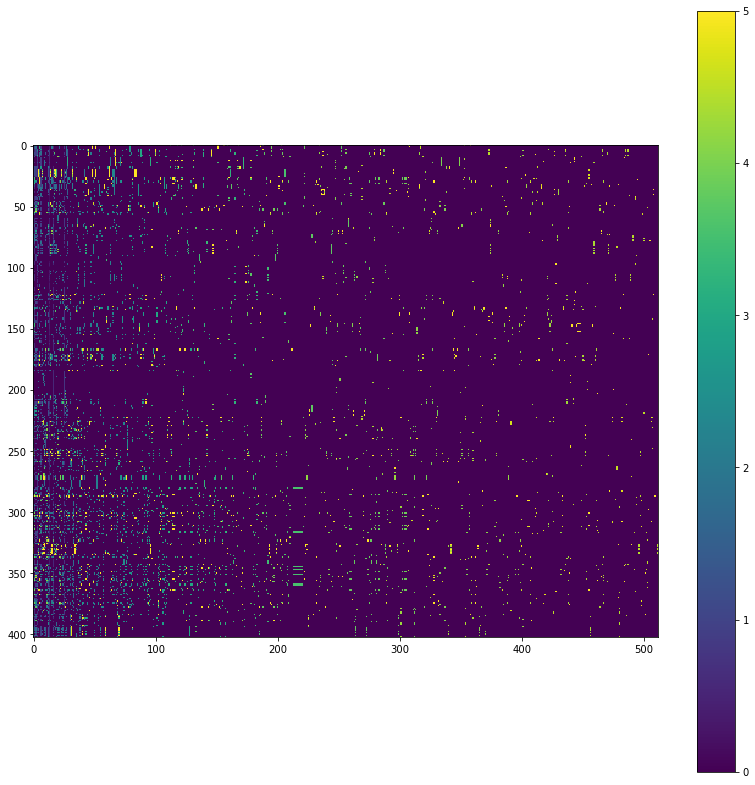

In [249]:
# TF-IDF
# tf_ij: number of times word i appears in problem j
# df_i: number of problems containing word i
# N: number of problems

problems_small = problems
N = float(len(problems))
print('Number of problems: ',N)

tfidf = []
for problem in tqdm(problems_small):
    c = Counter(problem)
    tfidf_row = []
    for word in wordDict:
        tfidf_row.append(c[word]*np.log(N/wordsPerProblem[word]))
    tfidf.append(np.array(tfidf_row))
    
tfidf = np.array(tfidf)
plt.figure(figsize=(14,14))
plt.imshow(tfidf[::50,:])
plt.colorbar()
plt.clim((0,5))


In [ ]:
print(tfidf.shape)

In [ ]:
# run tsne
tsne=TSNE(perplexity=30,verbose=2) #Instantiate the TSNE model (can change params here)
tfidf_tsne=tsne.fit_transform(xviz) #Run tsne

tsne_save=pd.DataFrame({'x': tfidf_tsne[:,0],
  'y': tfidf_tsne[:,1],
  'skill' : skills_viz})
tsne_save.to_csv('../d3-scatterplot/tsne_body_bagofwords.tsv',sep='\t',index=False,columns=['x','y','skill'])


In [ ]:
tfidf_tsne.shape

## Visualization Set

## Bag of Words Autoencoder

(18110, 512)
(2013, 512)
(18110,)
(2013,)


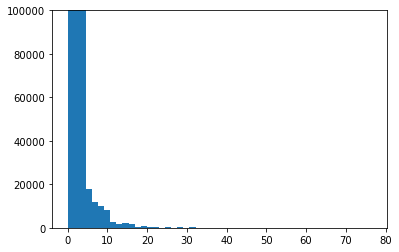

In [250]:
# split bag of words data into training and testing set
xtrain = []
xtest =[]
skills_train = []
skills_test = []
for i in np.arange(tfidf.shape[0]):
    if np.mod(i,10) == 0:
        xtest.append(tfidf[i,:])
        skills_test.append(skills[i])
    else:
        xtrain.append(tfidf[i,:])
        skills_train.append(skills[i])
        
xtrain = np.stack(xtrain, axis=0)
xtest = np.stack(xtest, axis=0)
skills_train = np.stack(skills_train, axis=0)
skills_test = np.stack(skills_test, axis=0)
print(xtrain.shape)
print(xtest.shape)
print(skills_train.shape)
print(skills_test.shape)

# Create visualization set (no nans)
xviz = []
skills_viz = []
for i in np.arange(1,tfidf.shape[0]):
    if isinstance(skills[i],str):
        xviz.append(tfidf[i,:])
        skills_viz.append(skills[i])
        
xviz = np.stack(xviz, axis=0)
skills_viz = np.stack(skills_viz, axis=0)

plt.hist(np.ndarray.flatten(tfidf), bins=50)
plt.ylim([0, 100000])

norm = 20 # normalization
xtrain = xtrain/norm
xtest = xtest/norm
xviz = xviz/norm

In [251]:
from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 64  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

input_img = Input(shape=(vs,))
encoded = Dense(256, activation='relu')(input_img)
encoded = Dense(128, activation='relu')(encoded)
encoded = Dense(encoding_dim, activation='relu')(encoded)

decoded = Dense(128, activation='relu')(encoded)
decoded = Dense(256, activation='relu')(decoded)
decoded = Dense(vs, activation='sigmoid')(decoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layers of the autoencoder model
decoder_layers = autoencoder.layers[-3](encoded_input)
decoder_layers = autoencoder.layers[-2](decoder_layers)
decoder_layers = autoencoder.layers[-1](decoder_layers)
# create the decoder model
decoder = Model(encoded_input, decoder_layers)

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [252]:
autoencoder.fit(xtrain, xtrain,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(xtest, xtest))

# save models
autoencoder.save('../../data/autoencoder_model.h5')
decoder.save('../../data/decoder_model.h5')
encoder.save('../../data/encoder_model.h5')

Train on 18110 samples, validate on 2013 samples
Epoch 1/50
18110/18110 [==============================] - 2s - loss: 0.2118 - val_loss: 0.0890

In [281]:
a = autoencoder.predict(tfidf/20)
print(np.asarray(wordDict)[np.where(tfidf[2200,:]>.03)])

['of' 'a' 'to' 'number' 'the' 'what' 'following' 'be' 'get' 'should' '23'
 '42' 'range' 'list']


In [265]:
encoded = encoder.predict(xviz)
encoded.shape

(13348, 64)

In [266]:
# SAVE autoencoder output #
print (xviz.shape)
print (len(skills_viz))
print (encoded.shape)
np.savez('../../data/autoencoder_output.npz', xviz=xviz, skills_viz=skills_viz, encoded=encoded)

(13348, 512)
13348
(13348, 64)


In [ ]:
# Test decoder
auto = autoencoder.predict(xviz)
decoded = decoder.predict(encoded)
print(np.max(np.abs(auto[1,:]-decoded[1,:])))

In [ ]:
tsne=TSNE(perplexity=30,verbose=2) #Instantiate the TSNE model (can change params here)
tfidf_tsne=tsne.fit_transform(encoded) #Run tsne
tsne_save=pd.DataFrame({'x': tfidf_tsne[:,0],
  'y': tfidf_tsne[:,1],
  'skill' : skills_viz})
#tsne_save=pd.DataFrame({'x': encoded[:,0],
#  'y': encoded[:,1],
#  'skill' : skills_viz})
tsne_save.to_csv('../d3-scatterplot/tsne_bagofwords_autoencoder.tsv',sep='\t',index=False,columns=['x','y','skill'])


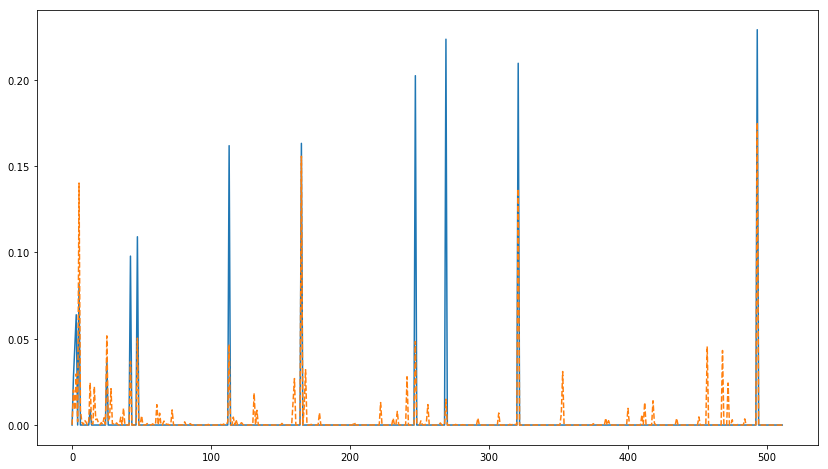

In [279]:
xpred = autoencoder.predict(tfidf/20)
plt.figure(figsize=(14,8))
n = 2200
plt.plot(tfidf[n,:]/20)
plt.plot(xpred[n,:], '--')
#print(xpred[n,:])

## Clustering

In [282]:
## Read in data ##
# xviz - tfidf encodings for all problems that have associated skills
# skills_viz - skill associated with each problem (list)
# encoded - autoencoder output for all problems in xviz
data = np.load('../../data/autoencoder_output.npz')
xviz = data['xviz']
skills_viz = data['skills_viz']
encoded = data['encoded']


In [283]:
from sklearn.cluster import KMeans

NC = 32 # number of clusters for K-means
kmeanse = KMeans(n_clusters=NC).fit(encoded)
kmeansb = KMeans(n_clusters=NC).fit(xviz) #bag of words encoding


In [284]:
labelse = kmeanse.labels_
labelsb = kmeansb.labels_
print(pd.Series(skills_viz[np.where(labelse==11)]).value_counts())

Box and Whisker     128
Number Line          44
Pattern Finding      37
dtype: int64


In [ ]:
print(skills_u)

In [285]:
# unique skills
skills_u = pd.Series(skills_viz).unique()
print(skills_u.shape)

# Which skills are in each cluster
A = np.zeros((skills_u.shape[0], NC))
B = np.zeros((skills_u.shape[0], NC))

# how many of each skill are in each cluster
A1 = np.zeros((skills_u.shape[0], NC))
B1 = np.zeros((skills_u.shape[0], NC))

for i in range(NC):
    unqe = pd.Series(skills_viz[np.where(labelse==i)]).unique()
    unqb = pd.Series(skills_viz[np.where(labelsb==i)]).unique()
    for skill in unqe:
        A[np.where(skills_u==skill), i] += 1;
        A1[np.where(skills_u==skill), i] = pd.Series(skills_viz[np.where(labelse==i)]).value_counts()[skill]
    for skill in unqb:
        B[np.where(skills_u==skill), i] += 1;
        B1[np.where(skills_u==skill), i] = pd.Series(skills_viz[np.where(labelsb==i)]).value_counts()[skill]
        

    

(96,)


In [ ]:
pd.Series(skills_viz[np.where(labelse==80)]).value_counts()

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(A1)
plt.xlabel('cluster')
plt.ylabel('skill')

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(B1)
plt.xlabel('cluster')
plt.ylabel('skill')

In [ ]:
plt.figure()
plt.plot(np.sum(A, axis=1))
plt.xlabel('Skill')
plt.figure()
plt.plot(np.sum(A, axis=0))
plt.xlabel('Cluster')
plt.figure()
plt.plot(np.sum(A1, axis=0))
plt.xlabel('Cluster')
plt.ylabel('Number of things per cluster')
print('Each skill is in an average of', np.mean(np.sum(A, axis=1)), 'clusters')
print('Each cluster has an average of', np.mean(np.sum(A, axis=0)), 'skills')

Each skill is in an average of 1.375 clusters
Each cluster has an average of 4.125 skills
43.0
0.68774348217


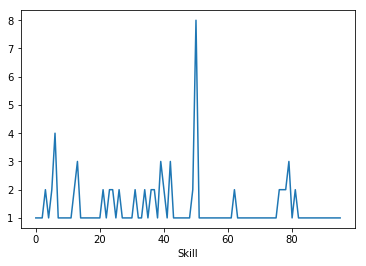

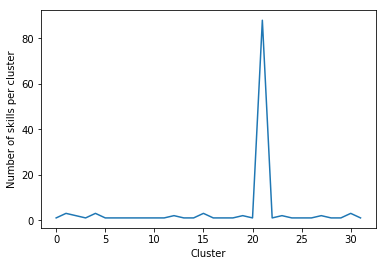

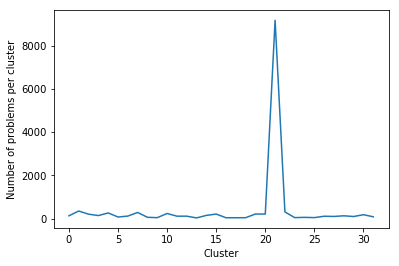

In [296]:
plt.figure()
plt.plot(np.sum(B, axis=1))
plt.xlabel('Skill')
plt.figure()
plt.plot(np.sum(B, axis=0))
plt.xlabel('Cluster')
plt.ylabel('Number of skills per cluster')
plt.figure()
plt.plot(np.sum(B1, axis=0))
plt.xlabel('Cluster')
plt.ylabel('Number of problems per cluster')
print('Each skill is in an average of', np.mean(np.sum(B, axis=1)), 'clusters')
print('Each cluster has an average of', np.mean(np.sum(B, axis=0)), 'skills')

s = np.sum(B1, axis=0)
print(s[23])
print(s[21]/np.sum(s))

In [ ]:
xviz.shape

In [ ]:
# Let's look at the cluster centers
centers = kmeanse.cluster_centers_ # returns centers x dimensionality of space
decoded_centers = decoder.predict(centers)

s = 30;

c = decoded_centers[s,:]
b = np.zeros(c.shape)
b = np.where(c>np.mean(c))
w = [wordDict[i] for i in np.ndarray.tolist(b[0])]
print(w)


In [ ]:
print(pd.Series(skills_viz[np.where(labelse==s)]).value_counts())

In [ ]:
NCr = 64
sse = np.zeros(NCr)
for NC in tqdm(range(NCr)): # number of clusters for K-means
    kmeanse = KMeans(n_clusters=(NC+1)).fit(encoded)
    labels = kmeanse.labels_
    centers = kmeanse.cluster_centers_
    for i in range(NC+1):
        sse[NC] += np.sum((encoded[np.where(labels==i)]-centers[i])**2)
        
plt.plot(np.arange(NCr)+1,sse)


In [ ]:
NCr = 64
sse = np.zeros(NCr)
for NC in tqdm(range(NCr)): # number of clusters for K-means
    kmeansb = KMeans(n_clusters=(NC+1)).fit(xviz)
    labels = kmeansb.labels_
    centers = kmeansb.cluster_centers_
    for i in range(NC+1):
        sse[NC] += np.sum((xviz[np.where(labels==i)]-centers[i])**2)
        
plt.plot(np.arange(NCr)+1,sse)

## Run Word2Vec

In [ ]:
from gensim.models import Word2Vec
assistment_df = pd.read_csv('assistment_id.tsv', sep='\t').drop('Unnamed: 0', axis=1)

In [ ]:
assistments=assistment_df.iloc[:,2:].values.astype(str) #Get rid of user_id
user_list=assistment_df.iloc[:,0].values.astype(int) #Get user_id
sentence_len=assistment_df.iloc[:,1].values.astype(int) #Extract number of responses
sentences=[]
#Copy only the ones that aren't nan
for i in range(len(sentence_len)):
    sentence=assistments[i,0:sentence_len[i]].tolist()
    sentences.append(sentence)

In [ ]:
#Each student is a "sentence", each skill is a "word"
#size = dimensionality of feature vectors
#window = max distance between current and predicted word within a sentence
#min_count = minimum number of occurrences within dataset
#workers = number of threads used
#sg = 0 (CBOW, default); = 1 (skip-gram)
model = Word2Vec(sentences, size=64, window=10, min_count=5, workers=4, sg=1, iter=30)

assist_num=model.wv.vocab; #Names of the words (numbers)
assist_vec=model[assist_num] #Access the vectors
print(len(assist_num))
print(assist_vec.shape)

In [ ]:
# Create list of skills

# Load entire Assistment dataframe to find the skills associated with each ID
filename = 'skill_builder_data_corrected.csv'
df = pd.read_csv(filename, encoding='ISO-8859-1', low_memory=False)
df = df[(df['original'] == 1) & (df['attempt_count'] == 1) & ~(df['skill_name'].isnull())]

print('Finding associated skills...')
assist_skill=list()
i = 0
x = assist_vec
print(x.shape)
for k,v in tqdm(assist_num.items()):
    if isinstance(k, str) & (k != 'nan'):
        skill = df[df['assistment_id'] == int(float(k))]['skill_name'].iloc[0] # get the first skill associated with the assistment
        assist_skill.append(skill)
    else:
        print(i)
        x = np.delete(assist_vec, (i), axis=0)
    i += 1
    
assist_vec = x
assist_skill=np.asarray(assist_skill)

In [ ]:
# save results
print(assist_skill.shape)
print(len(assist_num))
print(assist_vec.shape)
print(x.shape)

np.savez('../../data/word2vec_output.npz', assist_skill=assist_skill, assist_vec=assist_vec)

## Cluster Word2Vec

In [ ]:
# Look for clustering elbow

NCr = 64
sse = np.zeros(NCr)
for NC in tqdm(range(NCr)): # number of clusters for K-means
    kmeanse = KMeans(n_clusters=(NC+1)).fit(assist_vec)
    labels = kmeanse.labels_
    centers = kmeanse.cluster_centers_
    for i in range(NC+1):
        sse[NC] += np.sum((assist_vec[np.where(labels==i)]-centers[i])**2)
        
plt.plot(np.arange(NCr)+1,sse)


In [ ]:
NC = 32
kmeanswv = KMeans(n_clusters=NC).fit(assist_vec)
labelswv = kmeanswv.labels_

In [ ]:
print(pd.Series(np.asarray(assist_skill)[np.where(labelswv==14)]).value_counts())


In [ ]:
# unique skills
skills_u = pd.Series(assist_skill).unique()
print(skills_u.shape)

# Which skills are in each cluster
W = np.zeros((skills_u.shape[0], NC))


# how many of each skill are in each cluster
W1 = np.zeros((skills_u.shape[0], NC))


for i in range(NC):
    unqwv = pd.Series(assist_skill[np.where(labelswv==i)]).unique()
    for skill in unqwv:
        W[np.where(skills_u==skill), i] += 1;
        W1[np.where(skills_u==skill), i] = pd.Series(assist_skill[np.where(labelswv==i)]).value_counts()[skill]


In [ ]:
plt.figure(figsize=(8,8))
plt.imshow(W1)
plt.figure()
plt.plot(np.sum(W1,axis=0))

In [ ]:
labelswv.shape